<a href="https://colab.research.google.com/github/Lucas01iveira/metroclima-IC/blob/main/Tratamento%20de%20dados/Dados-ACP/Gr%C3%A1ficos_Urban_GHG_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1) Importando os dados e definindo os dataframes

In [ ]:
# dados de 2019
df1 = pd.read_csv('CRDS_Jaragua_G2301_hour_LT_2019.txt', usecols=['DATE_TIME','CO2_dry_m', 'CO2_dry_sd'])
df1 = df1.set_index('DATE_TIME')
df1.index = pd.to_datetime(df1.index)

r = pd.date_range(start='2019-01-01 00', end='2019-12-31 23', freq='H')
df1 = df1.reindex(r)

# dados do início de 2020 até o fim de 2021
df2 = pd.read_csv('CRDS_Jaragua_G2301_hour_LT_20_21.txt', usecols=['DATE_TIME','CO2_dry_m', 'CO2_dry_sd'])
df2 = df2.set_index('DATE_TIME')
df2.index = pd.to_datetime(df2.index)

# reorganizando tudo para colocar dados faltantes como "NaN"
r = pd.date_range(start='2020-01-01 00', end='2021-12-31 23', freq='H')
df2 = df2.reindex(r)

df = pd.concat([df1,df2])
df

FileNotFoundError: ignored

## 2) Gráficos ciclo diurno anual (estação do pico / período 2019-2021)

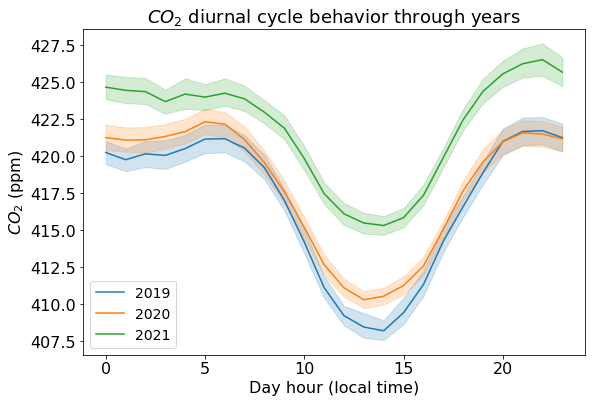

<Figure size 432x288 with 0 Axes>

In [ ]:
# Crio uma nova coluna com a classificação anual
df['Ano'] = df.index.year
#df['Total'] = df.groupby(df.index.hour)['CO2_dry_m'].mean()

# Gráfico
ax = plt.figure(figsize=(9,6))
ax = sns.lineplot(
    data= df, 
    x= df.index.hour,
    y= 'CO2_dry_m',
    hue= 'Ano',
    palette= 'tab10'
)

plt.ylabel('$CO_2$ (ppm)', fontsize= 16)
plt.xlabel('Day hour (local time)', fontsize= 16)
plt.title('$CO_2$ diurnal cycle behavior through years', fontsize= 18)
plt.legend(fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=16)

plt.show()
plt.savefig('Pico-diurno-19_20_21', dpi=300)

In [ ]:
# Médias anuais
'''
aux = df[df['Ano'] == 2019].describe()
aux.to_csv('Pico-describe-19.txt', sep='\t')

aux = df[df['Ano'] == 2020].describe()
aux.to_csv('Pico-describe-20.txt', sep='\t')

aux = df[df['Ano'] == 2021].describe()
aux.to_csv('Pico-describe-21.txt', sep='\t')
'''

aux = df.groupby(df.index.year)['CO2_dry_m'].agg(['mean', 'std']).round(3)
aux.to_csv('Pico-médias-anuais.txt', sep='\t')
print(aux)

         mean    std
2019  416.938  9.249
2020  417.881  8.082
2021  421.938  7.858


In [ ]:
# Taxas de recuperação (Fiz um teste e tá ok!)
df['avail'] = df['CO2_dry_m'].notnull()
a = df.groupby(df.index.year)['avail'].mean().round(3)
#a['avail'] = a['avail']*100

a.to_csv('Pico-RecoveryRate-19_20_21.txt', sep='\t')
a

2019    0.937
2020    0.851
2021    0.703
Name: avail, dtype: float64

In [ ]:
# Médias horárias 

aux = df.groupby([df.index.year,df.index.hour])['CO2_dry_m'].agg(['mean', 'std']).round(3)
aux.to_csv('Pico-médias_horárias-anuais.txt', sep='\t')
print(aux)

            mean    std
2019 0   420.243  7.495
     1   419.761  7.127
     2   420.155  8.477
     3   420.051  8.525
     4   420.512  8.731
...          ...    ...
2021 19  424.366  7.009
     20  425.553  7.504
     21  426.239  8.206
     22  426.513  9.148
     23  425.669  8.245

[72 rows x 2 columns]


## 3) Gráficos ciclo diurno sazonal (estação do pico / período 2019-2021)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


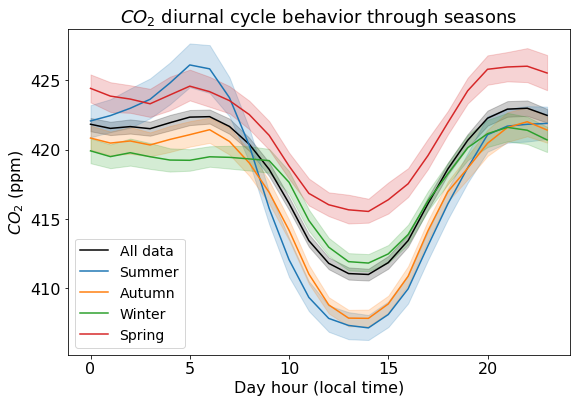

In [ ]:
# Construo primeiro o gráfico lineplot com todos os dados do dataframe 
# (antes de remover dez/2021 para o cálculo das seasons)
ax = plt.figure(figsize = (9,6))
ax = sns.lineplot(
    data= df,
    x= df.index.hour,
    y= 'CO2_dry_m',
    color='black',
    #err_style='bars',
    #marker='o',
    label='All data'
)


# Removo o mês de dezembro de 2021 (que compõe o verão de 2022)
df = df.loc[df.index < '2021-12-01 00']

# Acrescento a coluna com a organização das estações do ano
aux = (df.index.month % 12 + 3)// 3

df['Season'] = aux.map({
    1:'Summer',
    2:'Autumn',
    3:'Winter',
    4:'Spring'
})


ax = sns.lineplot(
    data= df,
    x= df.index.hour,
    y= 'CO2_dry_m',
    hue= 'Season'
    #palette= 'hls',
    #ci=None
    #err_style='bars',
    #marker='o'
)

plt.ylabel('$CO_2$ (ppm)', fontsize= 16)
plt.xlabel('Day hour (local time)', fontsize= 16)
plt.title('$CO_2$ diurnal cycle behavior through seasons', fontsize= 18)
plt.legend(fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('Pico-diurno-seasons.png', dpi=300)

# Obs.: O plot "all data" engloba todos os dados desde o início de 2019 até 2021

In [ ]:
# Médias sazonais
aux = df.groupby('Season')['CO2_dry_m'].agg(['mean', 'std']).round(3)
aux.to_csv('Pico-médias-sazonais.txt', sep= '\t')
print(aux)
print()

# Taxa de recuperação sazonal (fiz um teste e tá ok)
a = df.groupby('Season')['avail'].mean().round(3)
#a['avail'] = a['avail']*100

a.to_csv('Pico-RecoveryRate-seasons.txt', sep='\t')
print(a)

           mean    std
Season                
Autumn  416.948  8.455
Spring  421.692  8.805
Summer  417.495  9.863
Winter  417.910  7.518

Season
Autumn    0.912
Spring    0.830
Summer    0.577
Winter    0.952
Name: avail, dtype: float64


## 4) Reset de variáveis / recriando os dataframes

In [ ]:
# Reseto os dataframes para redefiní-los
del df
del df1
del df2

In [ ]:
# Pico
df1 = pd.read_csv('CRDS_Jaragua_G2301_hour_LT_20_21.txt', usecols=['DATE_TIME', 'CO2_dry_m', 'CO2_dry_sd'])
df1 = df1.set_index('DATE_TIME')
df1.index = pd.to_datetime(df1.index)

r = pd.date_range(start='2020-01-01 00', end='2021-12-31 23', freq='H')
df1 = df1.reindex(r)

df1['Station'] = 'Pico do Jaraguá'

# IAG
df2 = pd.read_csv('CRDS_IAG_G2301_hour_LT_20_21.txt', usecols=['DATE_TIME', 'CO2_dry_m', 'CO2_dry_sd'])
df2 = df2.set_index('DATE_TIME')
df2.index = pd.to_datetime(df2.index)

r = pd.date_range(start='2020-01-01 00', end='2021-12-31 23', freq='H')
df2 = df2.reindex(r)

df2['Station'] = 'IAG'

# Unicid
df3 = pd.read_csv('CRDS_UNICID_G2401_hour_LT_20_21.txt', usecols=['DATE_TIME', 'CO2_dry_m', 'CO2_dry_sd'])
df3 = df3.set_index('DATE_TIME')
df3.index = pd.to_datetime(df3.index)

df3.loc[(df3.index >= '2019-12-20') & (df3.index < '2020-01-11')] = np.nan
df3.loc[(df3.index >= '2020-03-30') & (df3.index < '2020-04-24')] = np.nan
df3.loc[(df3.index >= '2020-05-11') & (df3.index < '2020-06-19')] = np.nan
df3 = df3[~df3.index.duplicated()]

r = pd.date_range(start='2020-01-01 00', end='2021-12-31 23', freq='H')
df3 = df3.reindex(r)


df3['Station'] = 'Unicid'

df = pd.concat([df1, df2, df3])

df

,CO2_dry_m,CO2_dry_sd,Station
2020-01-01 00:00:00,415.036317,4.507944,Pico do Jaraguá
2020-01-01 01:00:00,413.252572,1.253210,Pico do Jaraguá
2020-01-01 02:00:00,415.457770,1.427799,Pico do Jaraguá
2020-01-01 03:00:00,421.090536,1.713576,Pico do Jaraguá
2020-01-01 04:00:00,427.715760,2.655637,Pico do Jaraguá
...,...,...,...
2021-12-31 19:00:00,NaN,NaN,Unicid
2021-12-31 20:00:00,NaN,NaN,Unicid
2021-12-31 21:00:00,NaN,NaN,Unicid
2021-12-31 22:00:00,NaN,NaN,Unicid


## 5) Ciclo diurno anual (todas as estações do projeto / período 2020-2021)

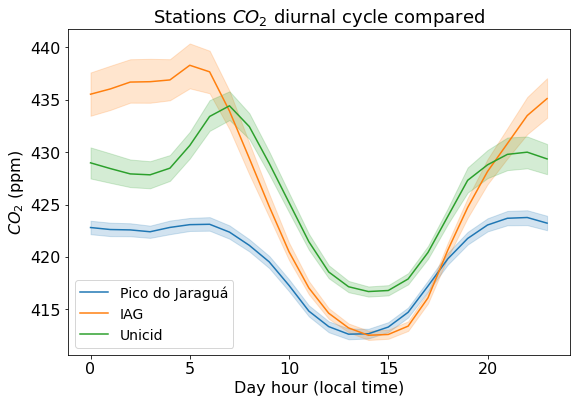

In [ ]:
# Construo o gráfico 

ax = plt.figure(figsize=(9,6))
ax = sns.lineplot(
    data= df[df['Station'] == 'Pico do Jaraguá'],
    x= df[df['Station'] == 'Pico do Jaraguá'].index.hour,
    y= 'CO2_dry_m',
    label='Pico do Jaraguá',
    #color='flare'
    #palette='flare'
)

ax = sns.lineplot(
    data= df[df['Station'] == 'IAG'],
    x= df[df['Station'] == 'IAG'].index.hour,
    y= 'CO2_dry_m',
    label='IAG',
    #color='flare'
    #palette='flare'
)

ax = sns.lineplot(
    data= df[df['Station'] == 'Unicid'],
    x= df[df['Station'] == 'Unicid'].index.hour,
    y= 'CO2_dry_m',
    label='Unicid',
    #color='flare'
    #palette='flare'
)

plt.ylabel('$CO_2$ (ppm)', fontsize= 16)
plt.xlabel('Day hour (local time)', fontsize= 16)
plt.title('Stations $CO_2$ diurnal cycle compared', fontsize= 18)
plt.legend(fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=16)

plt.show()

In [ ]:
# Valores médios de cada estação

aux = df.groupby('Station').agg(['mean', 'std'])['CO2_dry_m'].round(2)
aux.to_csv('Stations-médias-totais.txt', sep='\t')

## 6) Ciclo diurno semanal (todas as estações do projeto / período 2020-2021)

In [ ]:
# Para facilitar, defino os dataframes de cada estação
df_pico = df[df['Station'] == 'Pico do Jaraguá']
df_iag = df[df['Station'] == 'IAG']
df_unicid = df[df['Station'] == 'Unicid']

# crio, para cada um, a coluna dos dias da semana
df_pico['Weekday'] = df_pico.index.dayofweek
df_iag['Weekday'] = df_iag.index.dayofweek
df_unicid['Weekday'] = df_unicid.index.dayofweek

# organizo cada um para plotar
# pico
df_aux_pico = df_pico.groupby(['Weekday',df_pico.index.hour]).agg('mean')['CO2_dry_m'].round(2)

pico_seg = df_aux_pico[0]
pico_ter = df_aux_pico[1]
pico_qua = df_aux_pico[2]
pico_qui = df_aux_pico[3]
pico_sex = df_aux_pico[4]
pico_sab = df_aux_pico[5]
pico_dom = df_aux_pico[6]

semana_pico = pd.concat([pico_seg,
                         pico_ter,
                         pico_qua,
                         pico_qui,
                         pico_sex,
                         pico_sab,
                         pico_dom], ignore_index= True)

# iag
df_aux_iag = df_iag.groupby(['Weekday',df_iag.index.hour]).agg('mean')['CO2_dry_m'].round(2)

iag_seg = df_aux_iag[0]
iag_ter = df_aux_iag[1]
iag_qua = df_aux_iag[2]
iag_qui = df_aux_iag[3]
iag_sex = df_aux_iag[4]
iag_sab = df_aux_iag[5]
iag_dom = df_aux_iag[6]

semana_iag = pd.concat([iag_seg,
                        iag_ter,
                        iag_qua,
                        iag_qui,
                        iag_sex,
                        iag_sab,
                        iag_dom], ignore_index= True)

# unicid
df_aux_unicid = df_unicid.groupby(['Weekday',df_unicid.index.hour]).agg('mean')['CO2_dry_m'].round(2)

unicid_seg = df_aux_unicid[0]
unicid_ter = df_aux_unicid[1]
unicid_qua = df_aux_unicid[2]
unicid_qui = df_aux_unicid[3]
unicid_sex = df_aux_unicid[4]
unicid_sab = df_aux_unicid[5]
unicid_dom = df_aux_unicid[6]

semana_unicid = pd.concat([unicid_seg,
                           unicid_ter,
                           unicid_qua,
                           unicid_qui,
                           unicid_sex,
                           unicid_sab,
                           unicid_dom], ignore_index= True)

# Cada dataframe semanal já está, agora, perfeitamente ajustado;
# cada um tem a média das 24h diárias sobrepostas ao longo da semana

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

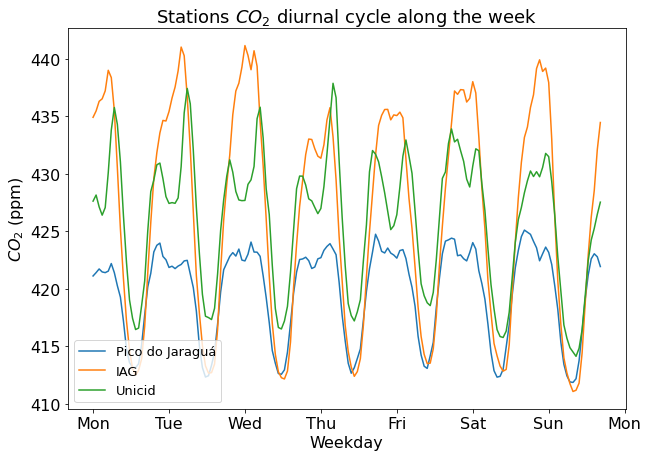

In [ ]:
# Ploto os gráficos
ax = plt.figure(figsize=(10,7))

# obs.: como os dataframes nomeados como "semana_x" só possuem um índice numérico
# e uma coluna, não há necessidade de especificar x e y na função lineplot
ax = sns.lineplot(
    data= semana_pico,
    label= 'Pico do Jaraguá'
)

ax = sns.lineplot(
    data= semana_iag,
    label= 'IAG'
)

ax = sns.lineplot(
    data= semana_unicid,
    label= 'Unicid'
)

plt.ylabel('$CO_2$ (ppm)', fontsize= 16)
plt.xlabel('Weekday', fontsize= 16)
plt.title('Stations $CO_2$ diurnal cycle along the week', fontsize= 18)
plt.legend(fontsize=13, loc= 'lower left')

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticklabels(['Mon', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon'])

plt.show()

## 7) Rosa dos ventos do Pico (período de 2019-2021)

In [ ]:
!pip install git+https://github.com/quishqa/qualR.py.git
import qualRpy.qualR as qr

  Cloning https://github.com/quishqa/qualR.py.git to /tmp/pip-req-build-fjkteky1
  Running command git clone -q https://github.com/quishqa/qualR.py.git /tmp/pip-req-build-fjkteky1
     |████████████████████████████████| 60 kB 2.9 MB/s 
     |████████████████████████████████| 251 kB 11.9 MB/s 
  Created wheel for qualRpy: filename=qualRpy-0.9.0-py3-none-any.whl size=6421 sha256=951086dbf9987c82971d435712fce78c67be1154c8289180102b611cc00dfbee
  Stored in directory: /tmp/pip-ephem-wheel-cache-rmt0on8i/wheels/e7/fb/9c/5f86195f616df55cd28857596315f0d0ac07c9cd08a0c0144e
Successfully built qualRpy


In [ ]:
# dados de 2019
dg1 = pd.read_csv('CRDS_Jaragua_G2301_hour_LT_2019.txt', usecols=['DATE_TIME','CO2_dry_m'])
dg1 = dg1.set_index('DATE_TIME')
dg1.index = pd.to_datetime(dg1.index)

r = pd.date_range(start='2019-01-01 00', end='2019-12-31 23', freq='H')
dg1 = dg1.reindex(r)

# dados do início de 2020 até o fim de 2021
dg2 = pd.read_csv('CRDS_Jaragua_G2301_hour_LT_20_21.txt', usecols=['DATE_TIME','CO2_dry_m'])
dg2 = dg2.set_index('DATE_TIME')
dg2.index = pd.to_datetime(dg2.index)

# reorganizando tudo para colocar dados faltantes como "NaN"
r = pd.date_range(start='2020-01-01 00', end='2021-12-31 23', freq='H')
dg2 = dg2.reindex(r)

dg_co2 = pd.concat([dg1,dg2])
dg_co2

,CO2_dry_m
2019-01-01 00:00:00,425.330977
2019-01-01 01:00:00,423.862410
2019-01-01 02:00:00,423.804281
2019-01-01 03:00:00,429.926824
2019-01-01 04:00:00,428.449103
...,...
2021-12-31 19:00:00,NaN
2021-12-31 20:00:00,NaN
2021-12-31 21:00:00,NaN
2021-12-31 22:00:00,NaN


In [ ]:
# Importo os dados de vento da cetesb
user = 'loliveirab1030@gmail.com'
password = 'onepiece_211'
station = 284 
parameter_wd = 23
parameter_ws = 24

start_date = '01/01/2019'
end_date = '31/12/2021'


dg_wd = qr.cetesb_retrieve(
    user,
    password,
    start_date,
    end_date,
    parameter_wd,
    station
)
dg_wd.rename(columns={'val': 'wd'}, inplace=True)
dg_wd = dg_wd.drop(['day', 'hour', 'name', 'pol_name', 'units'], axis=1)

dg_ws = qr.cetesb_retrieve(
    user,
    password,
    start_date,
    end_date,
    parameter_ws,
    station
)
dg_ws.rename(columns = {'val': 'ws'}, inplace=True)
dg_ws = dg_ws.drop(['day', 'hour', 'name', 'pol_name', 'units'], axis=1)

dg_w = pd.concat([dg_wd, dg_ws], axis=1)

In [ ]:
# Correção do index (desconsiderando o fuso-horário)
dg_w.index = dg_w.index.tz_localize(None)

# União do dataframe de co2 com o dataframe dos dados de vento
dg = pd.concat([dg_co2, dg_w], axis=1)

# Conversão do index para o padrão METROCLIMA
dg.index = dg.index - pd.Timedelta(hours=1)

r = pd.date_range(start='2019-01-01 00', end='2021-12-31 23', freq='H') # por desencargo de consciência
dg = dg.reindex(r)

dg

,CO2_dry_m,wd,ws
2019-01-01 00:00:00,423.862410,155.0,1.1
2019-01-01 01:00:00,423.804281,153.0,1.0
2019-01-01 02:00:00,429.926824,152.0,1.1
2019-01-01 03:00:00,428.449103,160.0,1.0
2019-01-01 04:00:00,424.492115,154.0,1.0
...,...,...,...
2021-12-31 19:00:00,NaN,NaN,NaN
2021-12-31 20:00:00,NaN,NaN,NaN
2021-12-31 21:00:00,NaN,NaN,NaN
2021-12-31 22:00:00,NaN,NaN,NaN


In [ ]:
# Para remover os valores 888 (padrão da cetesb para dados inexistentes/não coletados) aplicar o seguinte código:
filter_flags = dg['wd'] <= 360
dg['wd'].where(filter_flags, inplace=True)

In [ ]:
from windroses import wind_rose_pollution, wind_rose_pollution_season, wind_rose_speed

In [ ]:
wind_rose_speed??

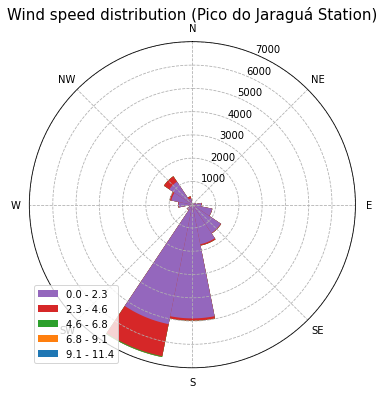

<Figure size 432x288 with 0 Axes>

In [ ]:
# Faço os plots

ax = plt.figure(figsize=(9,6))
ax = wind_rose_speed(dg, 'ws', 'wd')

plt.title('Wind speed distribution (Pico do Jaraguá Station)', fontsize=15)
plt.show()

plt.savefig('wind-rose-speed-19_20_21-min_bin5', dpi= 300)

In [ ]:
wind_rose_pollution??

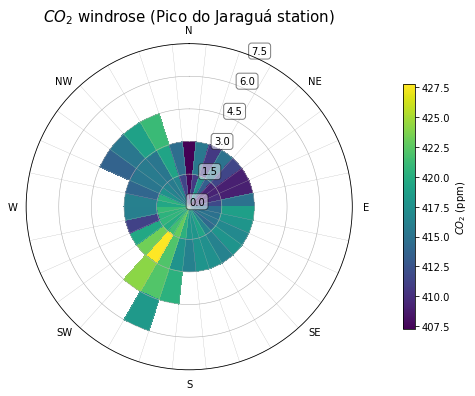

In [ ]:
# Faço os plots

ax = plt.figure(figsize=(9,6))
ax = wind_rose_pollution(dg, 'CO2_dry_m', 'ws', 'wd', '$CO_2$ (ppm)',nbins=30, min_bin = 5, lims=[0,1.5,3,4.5,6,7.5])

plt.title('$CO_2$ windrose (Pico do Jaraguá station)', fontsize=15)
plt.show()

In [ ]:
wind_rose_pollution_season??

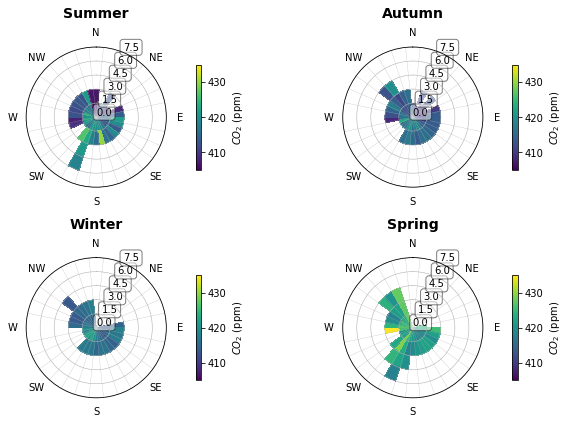

In [ ]:
# Faço os plots

ax = plt.figure(figsize=(9,6))
ax = wind_rose_pollution_season(dg, 'CO2_dry_m', 'ws', 'wd', '$CO_2$ (ppm)', nbins=30 ,min_bin = 5, lims=[0,1.5,3,4.5,6,7.5], z_values=[405,435])

#plt.suptitle('$CO_2$ windrose through seasons (Pico do Jaraguá station)', fontsize=15)
plt.show()